<u><h3 align="center">Packages required</h3></u>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()
from scipy import stats
import statistics
from datetime import date

<u><h3 align="center">Importing the dataset to Python</h3></u>

In [2]:
toy = pd.read_csv('Toys.csv') 

my_data = toy # copy of the original data

<u><h3 align="center">Understanding the Dataset</h3></u>

In [3]:
my_data.shape # There are 829262 observations and 14 columns

(829262, 14)

In [4]:
my_data.head()

# The first 5 observations of the dataset are displayed. 

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,01-01-2017,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,31-07-2010,Chutes & Ladders,Games,$9.99,$12.99,1.0
1,2,01-01-2017,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,01-04-2011,Action Figure,Toys,$9.99,$15.99,6.0
2,3,01-01-2017,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,13-12-2003,Deck Of Cards,Games,$3.99,$6.99,50.0
3,4,01-01-2017,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,23-03-2016,Dart Gun,Sports & Outdoors,$11.99,$15.99,28.0
4,5,01-01-2017,44,18,1,Maven Toys Puebla 3,Puebla,Residential,27-12-2014,Lego Bricks,Toys,$34.99,$39.99,117.0


In [5]:
my_data.columns

Index(['Sale_ID', 'Date', 'Store_ID', 'Product_ID', 'Units', 'Store_Name',
       'Store_City', 'Store_Location', 'Store_Open_Date', 'Product_Name',
       'Product_Category', 'Product_Cost', 'Product_Price', 'Stock_On_Hand'],
      dtype='object')

<u><h3 align="center">Checking for description, types and Null Values</h3></u>


In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 14 columns):
Sale_ID             829262 non-null int64
Date                829262 non-null object
Store_ID            829262 non-null int64
Product_ID          829262 non-null int64
Units               829262 non-null int64
Store_Name          829262 non-null object
Store_City          829262 non-null object
Store_Location      829262 non-null object
Store_Open_Date     829262 non-null object
Product_Name        829262 non-null object
Product_Category    829262 non-null object
Product_Cost        829262 non-null object
Product_Price       829262 non-null object
Stock_On_Hand       823030 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 88.6+ MB


In [7]:
my_data['Date'] = pd.to_datetime(my_data['Date'])
my_data['Store_Open_Date'] = pd.to_datetime(my_data['Store_Open_Date'])

In [8]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 14 columns):
Sale_ID             829262 non-null int64
Date                829262 non-null datetime64[ns]
Store_ID            829262 non-null int64
Product_ID          829262 non-null int64
Units               829262 non-null int64
Store_Name          829262 non-null object
Store_City          829262 non-null object
Store_Location      829262 non-null object
Store_Open_Date     829262 non-null datetime64[ns]
Product_Name        829262 non-null object
Product_Category    829262 non-null object
Product_Cost        829262 non-null object
Product_Price       829262 non-null object
Stock_On_Hand       823030 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memory usage: 88.6+ MB


In [9]:
print(min(my_data['Store_Open_Date']))
print(max(my_data['Store_Open_Date']))

1992-09-18 00:00:00
2016-10-05 00:00:00


In [10]:
my_data.describe()

,Sale_ID,Store_ID,Product_ID,Units,Stock_On_Hand
count,829262.000000,829262.000000,829262.000000,829262.000000,823030.000000
mean,414631.500000,25.277034,15.014149,1.315103,25.319432
std,239387.463803,14.352573,9.869417,0.830701,22.955019
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,207316.250000,13.000000,6.000000,1.000000,9.000000
50%,414631.500000,26.000000,14.000000,1.000000,18.000000
75%,621946.750000,38.000000,24.000000,1.000000,35.000000
max,829262.000000,50.000000,35.000000,30.000000,139.000000


In [11]:
(my_data.isna().any())

Sale_ID             False
Date                False
Store_ID            False
Product_ID          False
Units               False
Store_Name          False
Store_City          False
Store_Location      False
Store_Open_Date     False
Product_Name        False
Product_Category    False
Product_Cost        False
Product_Price       False
Stock_On_Hand        True
dtype: bool

In [12]:
missing_report = my_data.isnull().sum().reset_index().assign(
    misisng_percentage=lambda x: x[0]/my_data.shape[0] * 100).sort_values(
    by="misisng_percentage", ascending=False).rename(columns={"index": "column name", 0: "missing row count", 
                                                              "misisng_percentage" : "missing percentage"})

missing_report = missing_report[missing_report['missing percentage']>0]
missing_report

,column name,missing row count,missing percentage
13,Stock_On_Hand,6232,0.751512


In [13]:
my_data.dropna()

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,2017-01-01,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,$9.99,$12.99,1.0
1,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-01-04,Action Figure,Toys,$9.99,$15.99,6.0
2,3,2017-01-01,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,$3.99,$6.99,50.0
3,4,2017-01-01,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,$11.99,$15.99,28.0
4,5,2017-01-01,44,18,1,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,$34.99,$39.99,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,$13.99,$15.99,67.0
829258,829259,2018-09-30,16,35,1,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,$3.99,$7.99,6.0
829259,829260,2018-09-30,22,19,1,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,$13.99,$15.99,17.0
829260,829261,2018-09-30,13,2,2,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,$9.99,$12.99,2.0


In [14]:
my_data.isna().sum()

Sale_ID                0
Date                   0
Store_ID               0
Product_ID             0
Units                  0
Store_Name             0
Store_City             0
Store_Location         0
Store_Open_Date        0
Product_Name           0
Product_Category       0
Product_Cost           0
Product_Price          0
Stock_On_Hand       6232
dtype: int64

In [15]:
print(min(my_data.Store_Open_Date))
print(max(my_data.Store_Open_Date))

1992-09-18 00:00:00
2016-10-05 00:00:00


In [16]:
print("Cities: \n",my_data.Store_City.unique(),"\n")

Cities: 
 ['Aguascalientes' 'Puebla' 'Mexicali' 'Saltillo' 'Guadalajara' 'Toluca'
 'Chihuahua' 'Santiago' 'Villahermosa' 'Cuidad de Mexico' 'La Paz'
 'Pachuca' 'Monterrey' 'Hermosillo' 'Campeche' 'San Luis Potosi' 'Morelia'
 'Xalapa' 'Ciudad Victoria' 'Guanajuato' 'Chetumal' 'Oaxaca' 'Culiacan'
 'Merida' 'Chilpancingo' 'Cuernavaca' 'Durango' 'Tuxtla Gutierrez'
 'Zacatecas'] 



In [17]:
my_data.Store_City.value_counts().rename("No of Stores").reset_index()

,index,No of Stores
0,Cuidad de Mexico,90725
1,Guadalajara,74380
2,Monterrey,69323
3,Hermosillo,49835
4,Guanajuato,49220
5,Puebla,47408
6,Toluca,36309
7,Mexicali,33855
8,Xalapa,33807
9,Saltillo,33090


In [18]:
print("Location: \n",my_data.Store_Location.unique(),"\n")
my_data.Store_Location.value_counts().rename("No of Stores by Location Type").reset_index().assign(
    Percentage=lambda x: x['No of Stores by Location Type']*100/my_data.shape[0])

Location: 
 ['Downtown' 'Commercial' 'Residential' 'Airport'] 



,index,No of Stores by Location Type,Percentage
0,Downtown,480224,57.909804
1,Commercial,184705,22.273419
2,Residential,95876,11.561605
3,Airport,68457,8.255171


<Figure size 720x360 with 0 Axes>

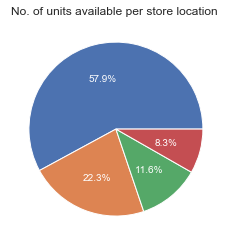

In [19]:
plt.figure(figsize=(10,5))
a_values = my_data.Store_Location.value_counts(normalize = True)*100
fig, ax = plt.subplots()
my_pie=ax.pie(a_values.values,labels = a_values.index, autopct='%.1f%%',textprops={'color':"w"})
ax.set_title("No. of units available per store location ")
plt.show()

In [20]:
# No of stores opened from 2000 
my_data.Store_Open_Date.value_counts(sort=True).rename('No of Stores opened').reset_index()

,index,No of Stores opened
0,2012-04-05,29024
1,2004-10-15,24482
2,2007-09-12,23533
3,2011-10-20,23384
4,2003-12-25,21300
5,2013-11-28,19551
6,2000-01-01,18924
7,2014-04-21,18809
8,2015-10-31,18739
9,2007-01-31,18157


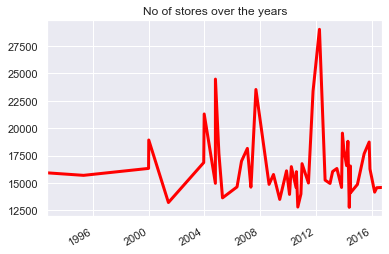

In [21]:
my_data.Store_Open_Date.value_counts(sort=True).plot(kind = 'line',linewidth=3,zorder=2,color = 'red',title = 'No of stores over the years')
plt.ylabel = 'no of stores'
plt.show()

In [22]:
my_data.Store_Location.value_counts().rename("No of Stores by Location Type").reset_index().assign(
    Percentage=lambda x: x['No of Stores by Location Type']*100/my_data.shape[0])

,index,No of Stores by Location Type,Percentage
0,Downtown,480224,57.909804
1,Commercial,184705,22.273419
2,Residential,95876,11.561605
3,Airport,68457,8.255171


In [23]:
print(my_data.Product_Category.unique())

my_data.Product_Category.value_counts().rename("Frequency").reset_index()

# The product category includes games, Toys,Sports & Outdoors,Art&Crafts and Electronics. 
# From the table we see that Toys have the highest frequency followed by Art and Crafts

['Games' 'Toys' 'Sports & Outdoors' 'Art & Crafts' 'Electronics']


,index,Frequency
0,Toys,221227
1,Art & Crafts,220673
2,Games,157006
3,Sports & Outdoors,131331
4,Electronics,99025


TypeError: 'str' object is not callable

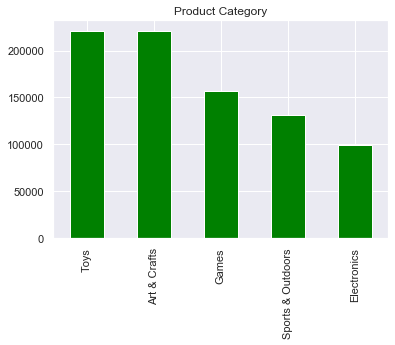

In [24]:
my_data.Product_Category.value_counts().plot(kind='bar',title = 'Product Category',color = 'green')
plt.ylabel("Amount")

In [25]:
units_sold = my_data.groupby('Store_Location')['Units'].sum().sort_values(ascending=False)
units_sold = units_sold.reset_index()
units_sold

,Store_Location,Units
0,Downtown,628073
1,Commercial,240648
2,Residential,125402
3,Airport,96442


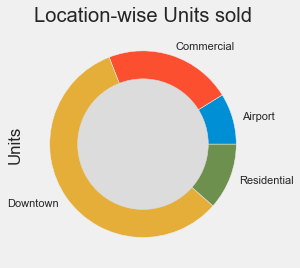

In [26]:
plt.style.use("fivethirtyeight")
my_data.groupby('Store_Location')['Units'].sum().plot(kind = 'pie')
circle = plt.Circle( (0,0), 0.7, color='gainsboro')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Location-wise Units sold')
plt.show()

In [27]:
print("Products: \n",my_data.Product_Name.unique(),"\n")
pro_sold = my_data.groupby('Product_Name')['Units'].sum().sort_values(ascending=False).head(10)
pro_sold = pro_sold.reset_index()
pro_sold

Products: 
 ['Chutes & Ladders' 'Action Figure' 'Deck Of Cards' 'Dart Gun'
 'Lego Bricks' 'Splash Balls' 'Animal Figures' 'Mini Ping Pong Set'
 'Dino Egg' 'Nerf Gun' 'PlayDoh Toolkit' 'Mini Basketball Hoop'
 'Uno Card Game' 'Toy Robot' 'Colorbuds' 'Glass Marbles'
 'Classic Dominoes' "Rubik's Cube" 'Teddy Bear' 'Monopoly'
 'Dinosaur Figures' 'Kids Makeup Kit' 'PlayDoh Can' "Barrel O' Slime"
 'Hot Wheels 5-Pack' 'Supersoaker Water Gun' 'Jenga' 'PlayDoh Playset'
 'Plush Pony' 'Gamer Headphones' 'Magic Sand' 'Mr. Potatohead'
 'Etch A Sketch' 'Foam Disk Launcher' 'Playfoam'] 



,Product_Name,Units
0,Colorbuds,104368
1,PlayDoh Can,103128
2,Barrel O' Slime,91663
3,Deck Of Cards,84034
4,Magic Sand,60598
5,Splash Balls,60248
6,Lego Bricks,59737
7,Action Figure,57958
8,Rubik's Cube,45672
9,Animal Figures,39089


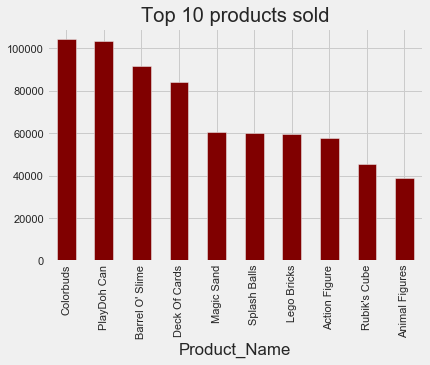

In [28]:
pro_sold = my_data.groupby('Product_Name')['Units'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color = 'maroon',title = 'Top 10 products sold')


In [29]:
my_data['Product_Name'].describe()

count        829262
unique           35
top       Colorbuds
freq          72988
Name: Product_Name, dtype: object

In [30]:
my_data.Product_Price = [x.strip('$') for x in my_data.Product_Price]
my_data["Product_Price"] = my_data["Product_Price"].astype(float)
my_data.Product_Price.head()

0    12.99
1    15.99
2     6.99
3    15.99
4    39.99
Name: Product_Price, dtype: float64

In [31]:
my_data.Product_Cost = [x.strip('$') for x in my_data.Product_Cost]
my_data["Product_Cost"] = my_data["Product_Cost"].astype(float)
my_data.Product_Cost.head()

0     9.99
1     9.99
2     3.99
3    11.99
4    34.99
Name: Product_Cost, dtype: float64

In [32]:
my_data.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand
0,1,2017-01-01,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0
1,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-01-04,Action Figure,Toys,9.99,15.99,6.0
2,3,2017-01-01,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,3.99,6.99,50.0
3,4,2017-01-01,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,11.99,15.99,28.0
4,5,2017-01-01,44,18,1,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,34.99,39.99,117.0


Product_Price
15.99    150144
14.99    140173
19.99    105521
2.99     103128
3.99      91663
6.99      84034
10.99     79912
8.99      60248
39.99     59737
9.99      59734
12.99     49334
20.99     30126
4.99      23128
5.99      22659
25.99     11749
24.99      8945
11.99      7620
7.99       2710
Name: Units, dtype: int64


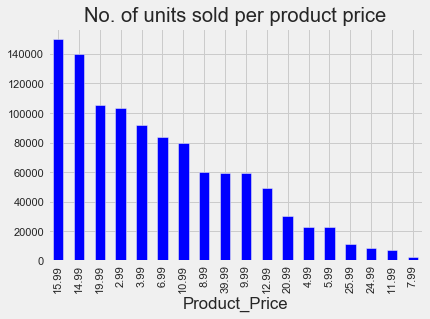

In [33]:
grp1 = my_data.groupby('Product_Price')['Units'].sum().sort_values(ascending=False)
grp1.plot(kind = 'bar',color = 'blue',title = "No. of units sold per product price")
print(grp1)

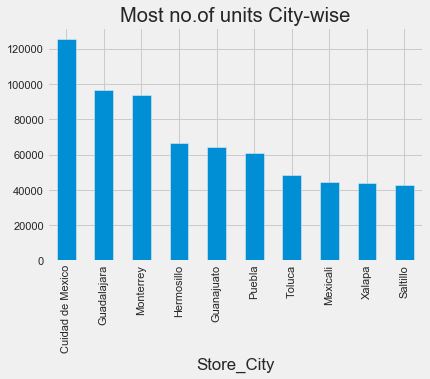

In [34]:
grp2 = my_data.groupby('Store_City')['Units'].sum().sort_values(ascending=False).head(10)
grp2.plot(kind = 'bar',title = "Most no.of units City-wise")

In [ ]:
grp2.reset_index()


,Product_Category,Stock_On_Hand
0,Art & Crafts,6571925.0
1,Games,5574628.0
2,Toys,4117832.0
3,Sports & Outdoors,2547407.0
4,Electronics,2026860.0


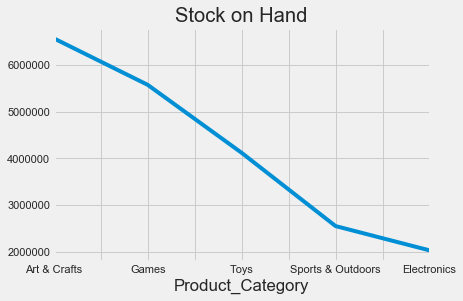

In [35]:
grp3 = my_data.groupby('Product_Category')['Stock_On_Hand'].sum().sort_values(ascending=False).head(10)
grp3.plot(kind = 'line',title = "Stock on Hand")
grp3.reset_index()

In [ ]:
my_data['Product_Name'].describe()

In [ ]:
my_data['Units'].describe()

In [ ]:
my_data['Store_City'].describe()

In [ ]:
my_data['Store_Location'].describe()

In [ ]:
my_data['Product_Category'].describe()

In [36]:
my_data['sales'] = my_data['Units'] * my_data['Product_Price']
my_data['cost'] = my_data['Units'] * my_data['Product_Cost']

In [37]:
my_data.tail()

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand,sales,cost
829257,829258,2018-09-30,24,19,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,13.99,15.99,67.0,15.99,13.99
829258,829259,2018-09-30,16,35,1,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,3.99,7.99,6.0,7.99,3.99
829259,829260,2018-09-30,22,19,1,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,13.99,15.99,17.0,15.99,13.99
829260,829261,2018-09-30,13,2,2,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,9.99,12.99,2.0,25.98,19.98
829261,829262,2018-09-30,32,6,1,Maven Toys Hermosillo 1,Hermosillo,Residential,2012-08-31,Colorbuds,Electronics,6.99,14.99,65.0,14.99,6.99


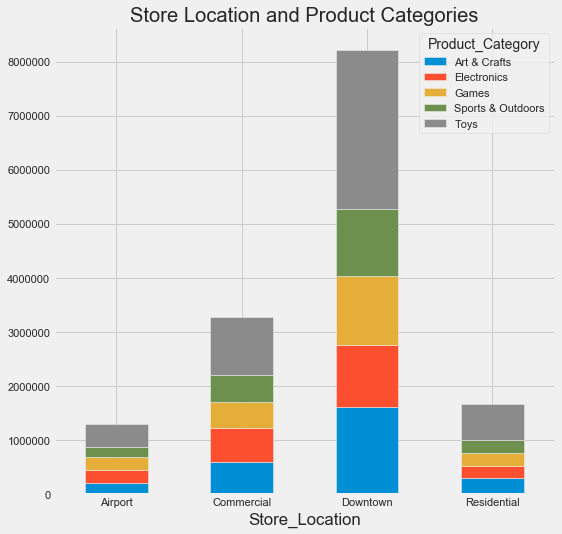

In [38]:
my_data.groupby(['Store_Location','Product_Category']).sum().unstack().plot(kind='bar',y='sales', stacked=True, figsize=(8, 8))
plt.xticks(rotation=0)
plt.title("Store Location and Product Categories")
plt.show()

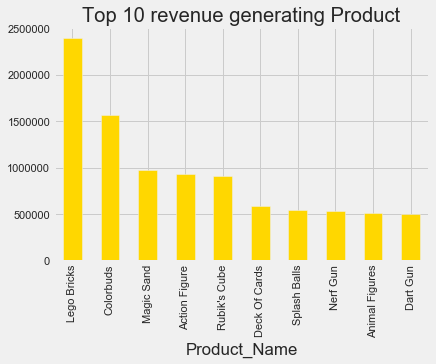

In [39]:
#Top 10 revenue generating Product
top_rev = my_data.groupby('Product_Name')['sales'].sum().sort_values(ascending=False).head(10)
my_data.groupby('Product_Name')['sales'].sum().sort_values(ascending=False).head(10).plot(kind ='bar',color='gold',title = 'Top 10 revenue generating Product')

In [ ]:
top_rev.reset_index()

In [41]:
my_data['Profit'] = (my_data['Product_Price']-my_data['Product_Cost'])/(my_data['Product_Cost'])
my_data.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand,sales,cost,Profit
0,1,2017-01-01,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0,12.99,9.99,0.300300
1,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-01-04,Action Figure,Toys,9.99,15.99,6.0,15.99,9.99,0.600601
2,3,2017-01-01,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,3.99,6.99,50.0,6.99,3.99,0.751880
3,4,2017-01-01,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,11.99,15.99,28.0,15.99,11.99,0.333611
4,5,2017-01-01,44,18,1,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,34.99,39.99,117.0,39.99,34.99,0.142898


In [42]:
#Top 10 profitable Product
top_pro= my_data.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_pro = top_pro.reset_index()
top_pro

,Product_Name,Profit
0,Colorbuds,83534.191702
1,Barrel O' Slime,54349.748744
2,Deck Of Cards,51190.225564
3,PlayDoh Can,32579.899497
4,Action Figure,29127.327327
5,Jenga,28428.428094
6,Glass Marbles,20456.594324
7,Mini Ping Pong Set,10462.660944
8,Hot Wheels 5-Pack,10414.035088
9,Etch A Sketch,10195.632393


In [43]:
#Location wise Revenue and Profit
top_location1 = my_data.groupby('Store_Location')['sales'].sum().sort_values(ascending=False).head(10)
top_location1 = top_location1.reset_index()
top_location1

topProfitLoc = my_data.groupby('Store_Location')['Profit'].sum().sort_values(ascending=False).head(10)
topProfitLoc = topProfitLoc.reset_index()

#merging with top_location
top_location1['Profit'] = round(topProfitLoc.Profit)
top_location1

,Store_Location,sales,Profit
0,Downtown,8.219596e+06,257136.0
1,Commercial,3.279140e+06,102646.0
2,Residential,1.656114e+06,52041.0
3,Airport,1.289723e+06,38113.0


In [ ]:
fig, ax = plt.subplots()
color = ['blue','orange','gold','green']
ax.set_ylabel('Revenue')
ax.set_title('BAR CHART FOR SALES')
my_data.groupby('Store_Location')['sales'].sum().plot(kind='bar',y='sales', stacked=True, figsize=(5, 5),color = color)
plt.show()

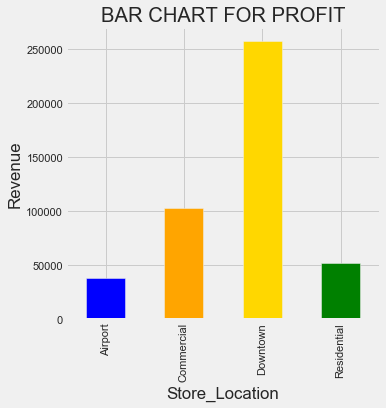

In [44]:
fig, ax = plt.subplots()
color = ['blue','orange','gold','green']
ax.set_ylabel('Revenue')
ax.set_title('BAR CHART FOR PROFIT')
my_data.groupby('Store_Location')['Profit'].sum().plot(kind='bar',y='sales', stacked=True, figsize=(5, 5),color = color )
plt.show()

In [45]:
#Profit to Sales Ration Analysis for Store Location
top_location1['Profit_to_Sales'] = top_location1['Profit']/top_location1['sales']
top_location1['Profit_to_Sales_in%']= top_location1['Profit']*100/top_location1['sales']
top_location1

,Store_Location,sales,Profit,Profit_to_Sales,Profit_to_Sales_in%
0,Downtown,8.219596e+06,257136.0,0.031283,3.128329
1,Commercial,3.279140e+06,102646.0,0.031303,3.130272
2,Residential,1.656114e+06,52041.0,0.031424,3.142356
3,Airport,1.289723e+06,38113.0,0.029551,2.955132


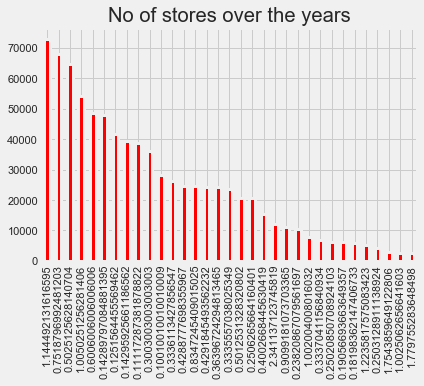

In [54]:
my_data.Profit.value_counts(sort=True).plot(kind = 'bar',linewidth=3,zorder=2,color = 'red',title = 'No of stores over the years')
plt.ylabel = 'no of stores'
plt.show()

In [60]:
my_data['year'] = my_data['Store_Open_Date'].dt.year
my_data

,Sale_ID,Date,Store_ID,Product_ID,Units,Store_Name,Store_City,Store_Location,Store_Open_Date,Product_Name,Product_Category,Product_Cost,Product_Price,Stock_On_Hand,sales,cost,Profit,year
0,1,2017-01-01,24,4,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Chutes & Ladders,Games,9.99,12.99,1.0,12.99,9.99,0.300300,2010
1,2,2017-01-01,28,1,1,Maven Toys Puebla 2,Puebla,Downtown,2011-01-04,Action Figure,Toys,9.99,15.99,6.0,15.99,9.99,0.600601,2011
2,3,2017-01-01,6,8,1,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,Deck Of Cards,Games,3.99,6.99,50.0,6.99,3.99,0.751880,2003
3,4,2017-01-01,48,7,1,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,Dart Gun,Sports & Outdoors,11.99,15.99,28.0,15.99,11.99,0.333611,2016
4,5,2017-01-01,44,18,1,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,Lego Bricks,Toys,34.99,39.99,117.0,39.99,34.99,0.142898,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829257,829258,2018-09-30,24,19,1,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,Magic Sand,Art & Crafts,13.99,15.99,67.0,15.99,13.99,0.142959,2010
829258,829259,2018-09-30,16,35,1,Maven Toys San Luis Potosi 1,San Luis Potosi,Downtown,2007-05-19,Uno Card Game,Games,3.99,7.99,6.0,7.99,3.99,1.002506,2007
829259,829260,2018-09-30,22,19,1,Maven Toys Guanajuato 2,Guanajuato,Commercial,2010-03-29,Magic Sand,Art & Crafts,13.99,15.99,17.0,15.99,13.99,0.142959,2010
829260,829261,2018-09-30,13,2,2,Maven Toys Mexicali 2,Mexicali,Downtown,2006-08-30,Animal Figures,Toys,9.99,12.99,2.0,25.98,19.98,0.300300,2006


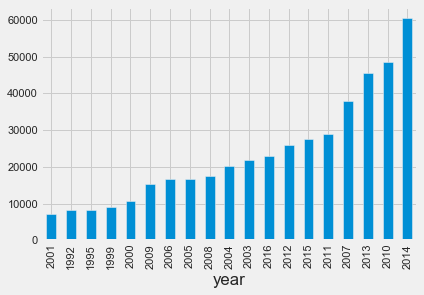

In [70]:
my_data.groupby(['year'])['Profit'].sum(sort = False).sort_values(ascending = True).plot(kind = 'bar')

In [83]:
no_of_cars= my_data.groupby("year").Profit.count()
no_of_cars.reset_index

<bound method Series.reset_index of year
1992     15926
1995     15698
1999     16331
2000     18924
2001     13217
2003     38164
2004     39451
2005     31338
2006     31635
2007     71807
2008     30651
2009     29612
2010     87876
2011     55146
2012     44288
2013     81472
2014    111714
2015     52683
2016     43329
Name: Profit, dtype: int64>

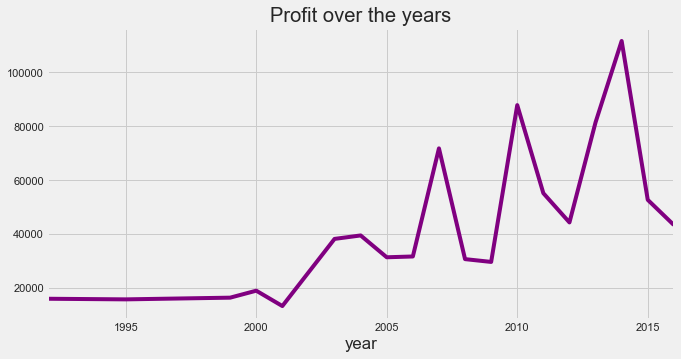

In [84]:
plt.figure(figsize=(10,5))
my_data.groupby("year").Profit.count().plot(kind = "line",color = 'Purple',
                                               title= "Profit over the years")